# Test Case for time series analysis

### Objective: Forcast traffic for JetRail  for next seven months. 
If they can get more than one million monthly user.

Data: Find about it in the attachment


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor as SGD
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression as lr
from sklearn.pipeline import Pipeline 


In [3]:
from datetime import date
import datetime as d

### Data visialization, exploration

In [4]:
data=pd.read_csv("./Train_SU63ISt.csv",sep=',', header='infer')
data.sample(5)

,ID,Datetime,Count
13174,13174,24-02-2014 22:00,290
6345,6345,16-05-2013 09:00,22
7795,7795,15-07-2013 19:00,118
2471,2471,05-12-2012 23:00,10
17766,17766,04-09-2014 06:00,250


In [5]:
data['Count'].describe()

count    18288.000000
mean       138.958115
std        153.467461
min          2.000000
25%         22.000000
50%         84.000000
75%        210.000000
max       1244.000000
Name: Count, dtype: float64

In [6]:
data['Count'].nunique()

437

(array([1.1089e+04, 3.7080e+03, 1.9700e+03, 8.7300e+02, 3.8700e+02,
        1.7500e+02, 4.2000e+01, 3.1000e+01, 8.0000e+00, 5.0000e+00]),
 array([   2. ,  126.2,  250.4,  374.6,  498.8,  623. ,  747.2,  871.4,
         995.6, 1119.8, 1244. ]),
 <BarContainer object of 10 artists>)

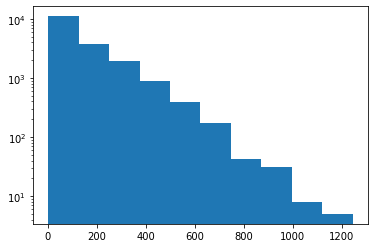

In [7]:
plt.hist(data.Count, histtype='bar', align='mid', orientation='vertical',log= True, label="Projection of traffic data")


###### random dataponts drawn just to obtain a line graph

In [8]:
a=data['Datetime'].values
# print(type(a[5]))
data['Datetime']=data['Datetime'].astype({'Datetime': 'datetime64[ns]'})
a=data['Datetime'].values
# print(type(a[5]))


#### Let's see simple model first :)

In [9]:
model= SGD(loss='squared_loss',penalty='l2', alpha=0.0001, l1_ratio=0.15, 
                                  fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, epsilon=0.1, 
                                  learning_rate='invscaling', eta0=0.01, power_t=0.25, 
                                  early_stopping=False,validation_fraction=0.1, n_iter_no_change=5, warm_start=True)


In [10]:
model_lr=lr()
model_lr.fit(data.loc[:, (data.columns !='Count') & (data.columns !='ID')], data.Count)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
data.loc[:, (data.columns !='Count') & (data.columns !='ID')].sample(5)

,Datetime
446,2012-12-09 14:00:00
16000,2014-06-22 16:00:00
16786,2014-07-25 10:00:00
5723,2013-04-20 11:00:00
14124,2014-05-04 12:00:00


With same operation on different dataset of same datetime value,  we are getting getting different result 

In [12]:
print(model_lr.coef_)
print(model_lr.intercept_)

[5.21130455e-15]
-7045.699701414517


In [13]:
data_test=pd.read_csv('./Test_0qrQsBZ.csv')
t=data_test['Datetime'].values
type(t[5])

str

Note the datatype here is string

In [14]:
predicted_value=model_lr.predict(data_test['ID'].to_frame())

Since 'ID' already provides us with monotonically increasing data, we used it as an alternative to 'Datetime' data. 

In [15]:
R_predicted_value=np.round(predicted_value)
print(pd.DataFrame(predicted_value).describe())
print(pd.DataFrame(R_predicted_value).describe())

                  0
count  5.112000e+03
mean  -7.045700e+03
std    6.791099e-10
min   -7.045700e+03
25%   -7.045700e+03
50%   -7.045700e+03
75%   -7.045700e+03
max   -7.045700e+03
            0
count  5112.0
mean  -7046.0
std       0.0
min   -7046.0
25%   -7046.0
50%   -7046.0
75%   -7046.0
max   -7046.0


Just for comparison

#### Will be using 'ID' column for plotting

<BarContainer object of 5112 artists>

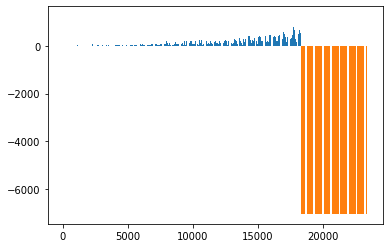

In [16]:
plt.bar(data['ID'],data.Count)
plt.bar(data_test['ID'],R_predicted_value)

The basic regression model does not seem to be accurately predicting the trend. 

### Predicting data with higher order curve


In [17]:
model_poly = Pipeline([('poly', pf(degree=3)),
                  ('linear', lr(fit_intercept=False))])

In [18]:
model_poly.fit(data.loc[:, (data.columns != 'ID')& (data.columns != 'Count')], data.Count)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [19]:
poly_output=model_poly.predict(data_test['ID'].to_frame())

<BarContainer object of 5112 artists>

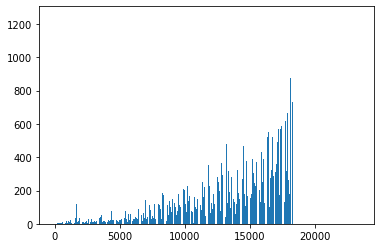

In [20]:
plt.bar(data['ID'],data.Count)
plt.bar(data_test['ID'],poly_output)

#### The above genereated graph in present errorneous condition (assuming the model is going to be cubic) certainly shows favourale projection in furthering the cause. So either higher model is required or some feature on the basis of which data can be extracted is needed.

#### Trying a higher 5th order curve which is likely to generate similar result.

In [21]:
model_poly2 = Pipeline([('poly', pf(degree=5)),
            ('linear', lr(fit_intercept=False))])

In [22]:
model_poly2.fit(data.loc[:, (data.columns == 'ID')], data.Count)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [23]:
poly_output2=model_poly.predict(data_test['ID'].to_frame())

<BarContainer object of 5112 artists>

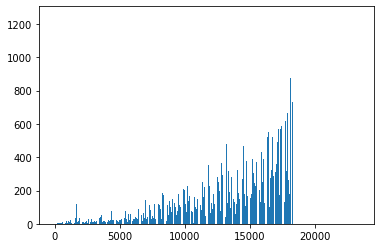

In [24]:
plt.bar(data['ID'],data.Count)
plt.bar(data_test['ID'],poly_output)

In [25]:
# pd.DataFrame(predicted_value).to_csv('Output1')

This is a simple output obtained after fitting a liner and two polynomial curve to the data. This result at the face looks errorneous. This can be further be improved by feature generation.

## Feature Generation 

In [26]:
data_1=pd.read_csv("./Train_SU63ISt.csv",sep=',', header='infer')
data_1['Datetime']=data_1['Datetime'].astype({'Datetime': 'datetime64[ns]'})

In [27]:
data_2=pd.read_csv("./Test_0qrQsBZ.csv",sep=',', header='infer')
data_2['Datetime']=pd.to_datetime(data_2['Datetime'])

In [28]:
data_1['Day_of_week']=data_1['Datetime'].dt.dayofweek
data_1['Hour_of_day']=data_1['Datetime'].dt.hour

In [29]:
data_2['Day_of_week']=data_2['Datetime'].dt.dayofweek
data_2['Hour_of_day']=data_2['Datetime'].dt.hour

#### To perform one hot encoding on categorical data of day and time of day to gain insight on granular level of data 

In [30]:
Train=pd.get_dummies(data_1['Day_of_week'],prefix='Day',dtype= np.int64)
Train2=pd.get_dummies(data_1['Hour_of_day'],prefix='Hour',dtype= np.int64)
training=[data_1, Train, Train2]
T_data=pd.concat(training, axis=1)
T_data.sample(3)

,ID,Datetime,Count,Day_of_week,Hour_of_day,Day_0,Day_1,Day_2,Day_3,Day_4,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
4981,4981,2013-03-20 13:00:00,18,2,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6310,6310,2013-05-14 22:00:00,66,1,22,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15183,15183,2014-05-19 15:00:00,426,0,15,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
T_data.drop(columns=['Datetime','Day_of_week','Hour_of_day'],axis=1,inplace=True)
T_data.sample(3)

,ID,Count,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Hour_0,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
1104,1104,6,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10638,10638,78,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4159,4159,14,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
Test=pd.get_dummies(data_2['Day_of_week'],prefix='Day',dtype= np.int64)
Test2=pd.get_dummies(data_2['Hour_of_day'],prefix='Hour',dtype= np.int64)
Testing=[data_2, Test, Test2]
Test_data=pd.concat(Testing, axis=1)
Test_data.sample(3)

,ID,Datetime,Day_of_week,Hour_of_day,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
69,18357,2014-09-28 21:00:00,6,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2148,20436,2014-12-24 12:00:00,2,12,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,21784,2015-02-18 16:00:00,2,16,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
Test_data.drop(['Datetime','Day_of_week','Hour_of_day'],axis=1,inplace=True)
T_data.sample(3)

,ID,Count,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Hour_0,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
7746,7746,50,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
17875,17875,636,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
14770,14770,284,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
model_4=lr()
model_4.fit(T_data.loc[:, (T_data.columns !='Count')], T_data.Count)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
prediction_4=model_4.predict(Test_data)

<BarContainer object of 18288 artists>

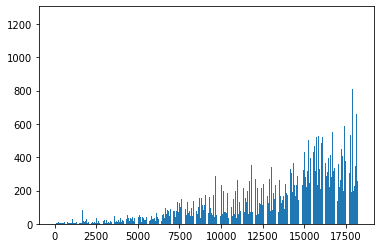

In [36]:
plt.bar(data['ID'],data.Count)

<BarContainer object of 5112 artists>

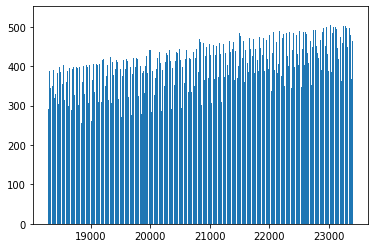

In [37]:
plt.bar(data_test['ID'],prediction_4)

<BarContainer object of 5112 artists>

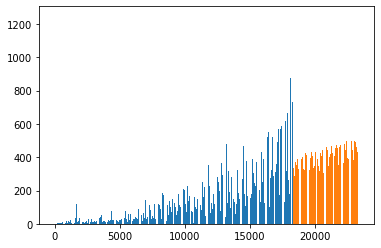

In [38]:
plt.bar(data['ID'],data.Count)
plt.bar(data_test['ID'],prediction_4)

The graph is linear exprapolation  of the trend which seems to get a rough average estimate. But since the trend is not well-depicted by the linear exprapolation, we will be fitting a higher order curve.(A more curvy/wiggly graph)   

In [39]:
pd.DataFrame(prediction_4).describe()

,0
count,5112.000000
mean,404.588788
std,56.677866
min,244.733938
25%,365.845390
50%,407.394336
75%,448.300594
max,525.665542


In [40]:
model_poly5 = Pipeline([('poly', pf(degree=3)),
            ('linear', lr(fit_intercept=False))])

In [41]:
model_poly5.fit(T_data.loc[:, (T_data.columns !='Count')], T_data.Count)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [42]:
prediction5=model_poly5.predict(Test_data)

<BarContainer object of 5112 artists>

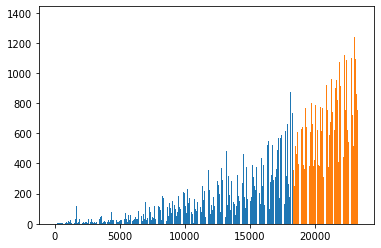

In [43]:
plt.bar(data['ID'],data.Count)
plt.bar(data_test['ID'],prediction5)

In [44]:
pd.DataFrame(prediction5).describe()

,0
count,5112.000000
mean,671.999266
std,239.138972
min,187.175094
25%,486.358895
50%,659.526919
75%,841.966667
max,1373.319278


In [45]:
np.sum(pd.DataFrame(prediction5).tail(30*24)) #24 hrs* 30=monthly record

0    630758.966331
dtype: float64

The projection is only for an approximate period of six months. The projection in the next is likely to reach the point of 1 million.(The later is more of an intutive guess based upon above projection)

#### Generate data for further analysis

In [55]:
import datetime



In [60]:
def generate_time_data():
    id=23399
    ID=[]
    Datetime=[]
    date=datetime.datetime(year=2015,month=4,day=26,hour=23)
    while date < datetime.datetime(year=2016,month=4,day=27,hour=0,):
        time_offset=1
        final_time=date+datetime.timedelta(hours=time_offset)
        id=id+1
        date=final_time
        date=pd.to_datetime(date)
        ID.append(id)
        Datetime.append(final_time)
    
    data_forcast=[ID,Datetime]
    data_forcast=np.transpose(data_forcast)
    data_forcast=pd.DataFrame(data_forcast,columns=['ID','Datetime'])
    
#     data_forcast.to_csv('data_forcast')
    return data_forcast
       

In [62]:
data_forcast=generate_time_data()
pd.to_datetime(data_forcast['Datetime'])


0      2015-04-27 00:00:00
1      2015-04-27 01:00:00
2      2015-04-27 02:00:00
3      2015-04-27 03:00:00
4      2015-04-27 04:00:00
               ...        
8780   2016-04-26 20:00:00
8781   2016-04-26 21:00:00
8782   2016-04-26 22:00:00
8783   2016-04-26 23:00:00
8784   2016-04-27 00:00:00
Name: Datetime, Length: 8785, dtype: datetime64[ns]

In [63]:
data_forcast['Day_of_week']=data_forcast['Datetime'].dt.dayofweek
data_forcast['Hour_of_day']=data_forcast['Datetime'].dt.hour

In [64]:
Test3=pd.get_dummies(data_forcast['Day_of_week'],prefix='Day',dtype= np.int64)
Test4=pd.get_dummies(data_forcast['Hour_of_day'],prefix='Hour',dtype= np.int64)
Testing1=[data_forcast, Test3, Test4]
data_forcast=pd.concat(Testing1, axis=1)

In [65]:
data_forcast.drop(['Datetime','Day_of_week','Hour_of_day'],axis=1,inplace=True)


In [66]:
prediction6=model_poly5.predict(data_forcast)

<BarContainer object of 8785 artists>

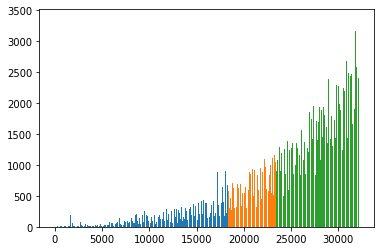

In [67]:
plt.bar(data['ID'],data.Count)
plt.bar(data_test['ID'],prediction5)
plt.bar(data_forcast['ID'],prediction6)

In [68]:
prediction6=pd.DataFrame(prediction6)
print(np.int64(prediction6.tail(30*24).sum()))

[1666836]


#### According to the prediction made by this model, the number of passenger travelling by the end of 18 months would be closer to 16 million. This would me approximately 60% more than the required estimate.

### Analysis and Conclusion

<BarContainer object of 8785 artists>

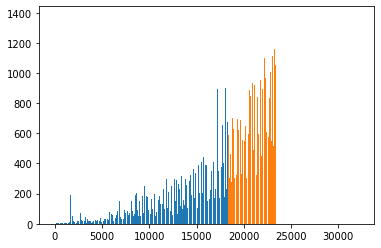

In [69]:
plt.bar(data['ID'],data.Count)
plt.bar(data_test['ID'],prediction5)
plt.bar(data_forcast['ID'],prediction6)

In [70]:
pd.DataFrame(prediction6).describe()

,0
count,8785.000000
mean,1572.994381
std,563.957521
min,448.167107
25%,1153.455437
50%,1502.188329
75%,1958.455420
max,3350.718498


In [71]:
prediction6=pd.DataFrame(prediction6)
print(np.int64(prediction6.tail(30*24).sum()))

[1666836]


Since this is basic level analysis, I conclude the work here. Thank You. :D 